In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
%matplotlib inline
from matplotlib import rcParams


sns.set_style('darkgrid')
rcParams['figure.figsize']= 14.7, 7.27

In [22]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Top%20250s%20in%20IMDB/imdb(MOVIES).csv")

In [23]:
raw_df.head()

,ranking of movie,movie name,Year,certificate,runtime,genre,RATING,DETAIL ABOUT MOVIE,DIRECTOR,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,votes,metascore,GROSS COLLECTION
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M
3,4,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,$534.86M
4,5,The Godfather: Part II,-1974,R,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1202401,90.0,$57.30M


In [24]:
to_drop = ['certificate', 'DETAIL ABOUT MOVIE', 'ACTOR 1', 'ACTOR 2', 'ACTOR 3', 'ACTOR 4', 'GROSS COLLECTION']
movies_df = raw_df.drop(columns= to_drop)
movies_df.head()

,ranking of movie,movie name,Year,runtime,genre,RATING,DIRECTOR,votes,metascore
0,1,Jai Bhim,-2021,164 min,"Crime, Drama",9.4,T.J. Gnanavel,163431,NaN
1,2,The Shawshank Redemption,-1994,142 min,Drama,9.3,Frank Darabont,2515762,80.0
2,3,The Godfather,-1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,1732749,100.0
3,4,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2466041,84.0
4,5,The Godfather: Part II,-1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,1202401,90.0


In [25]:
movies_df.isnull().sum()

ranking of movie     0
movie name           0
Year                 0
runtime              0
genre                0
RATING               0
DIRECTOR             0
votes                0
metascore           32
dtype: int64

In [26]:
movies_df = movies_df.fillna(movies_df['metascore'].mean())
movies_df.isnull().sum()

ranking of movie    0
movie name          0
Year                0
runtime             0
genre               0
RATING              0
DIRECTOR            0
votes               0
metascore           0
dtype: int64

In [27]:
to_rename = {
    'ranking of movie': 'ranking',
    'movie name ': 'name',
    'Year': 'year',
    'runtime': 'length',
    'RATING': 'rating',
    'DIRECTOR ': 'director'
}

movies_df.rename(columns = to_rename, inplace = True)
movies_df.head()

,ranking,name,year,length,genre,rating,director,votes,metascore
0,1,Jai Bhim,-2021,164 min,"Crime, Drama",9.4,T.J. Gnanavel,163431,82.449541
1,2,The Shawshank Redemption,-1994,142 min,Drama,9.3,Frank Darabont,2515762,80.000000
2,3,The Godfather,-1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,1732749,100.000000
3,4,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,2466041,84.000000
4,5,The Godfather: Part II,-1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,1202401,90.000000


In [28]:
movies_df['year'] = movies_df['year'].str.replace('-', '')

movies_df['year'] = pd.to_datetime(movies_df['year'], errors = 'coerce').dt.year
movies_df['year'] = movies_df['year'].astype('Int64')

In [29]:
movies_df['length'] = movies_df['length'].str.replace(' min', '')
movies_df['length'] = movies_df['length'].astype('int64')

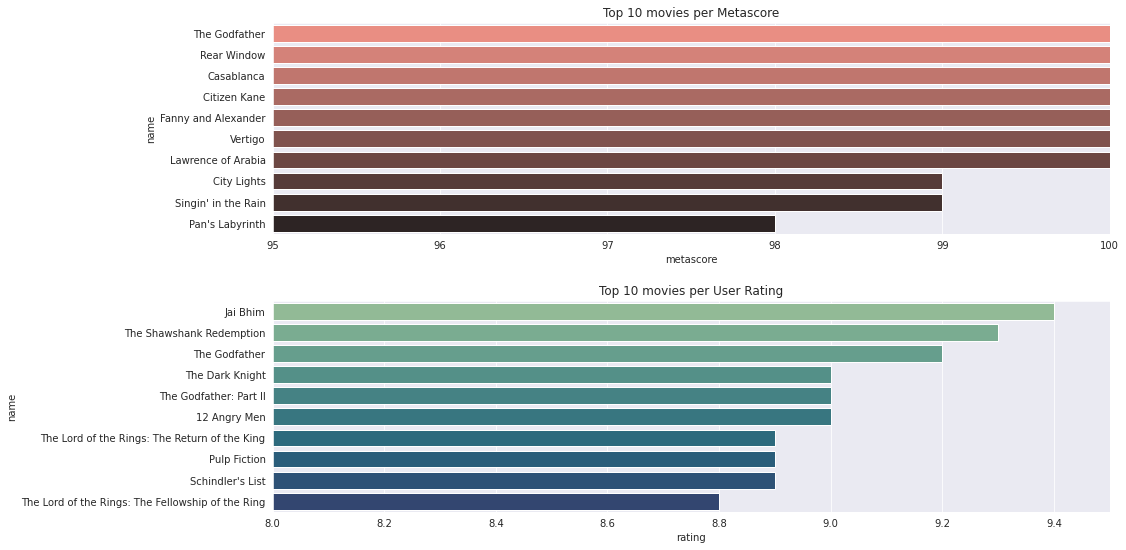

In [30]:
top_per_ms = movies_df[['name', 'metascore']].sort_values('metascore', ascending = False).head(10)

top_per_ur = movies_df[['name', 'rating']].sort_values('rating', ascending = False).head(10)
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (16,8))

ax1.set_title('Top 10 movies per Metascore')
ax1.set_xlim(95, 100)
sns.barplot(x = 'metascore', y = 'name', data = top_per_ms, ax = ax1, palette = 'dark:salmon_r');

ax2.set_title('Top 10 movies per User Rating')
ax2.set_xlim(8, 9.5)
sns.barplot(x = 'rating', y = 'name', data = top_per_ur, ax = ax2, palette = 'crest');

plt.tight_layout(pad= 2)

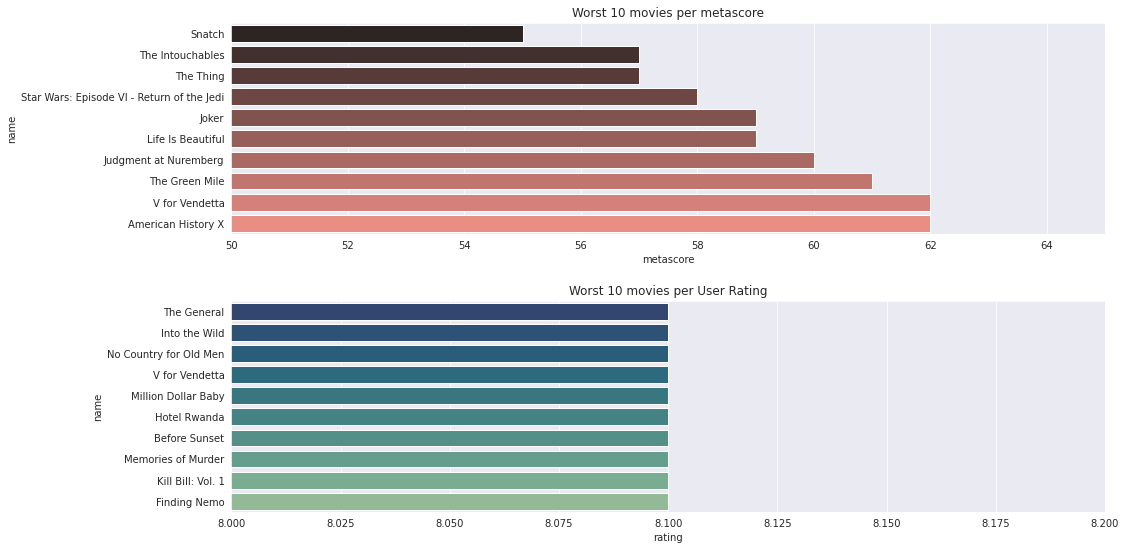

In [31]:
worst_per_ms = movies_df[['name', 'metascore']].sort_values('metascore', ascending = True).head(10)

worst_per_ur = movies_df[['name', 'rating']].sort_values('rating', ascending = True).head(10)
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (16,8))

ax1.set_title('Worst 10 movies per metascore')
ax1.set_xlim(50, 65)
sns.barplot(x = 'metascore', y = 'name', data = worst_per_ms, ax = ax1, palette = 'dark:salmon');

ax2.set_title('Worst 10 movies per User Rating')
ax2.set_xlim(8.0,8.2)
sns.barplot(x = 'rating', y = 'name', data  = worst_per_ur, ax =ax2, palette = 'crest_r');

plt.tight_layout(pad = 2)

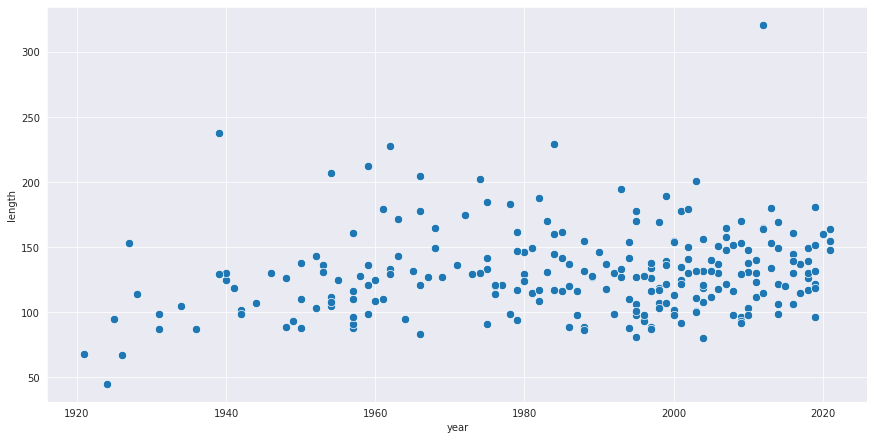

In [32]:
sns.scatterplot(x = 'year', y = 'length', data = movies_df, s = 70);

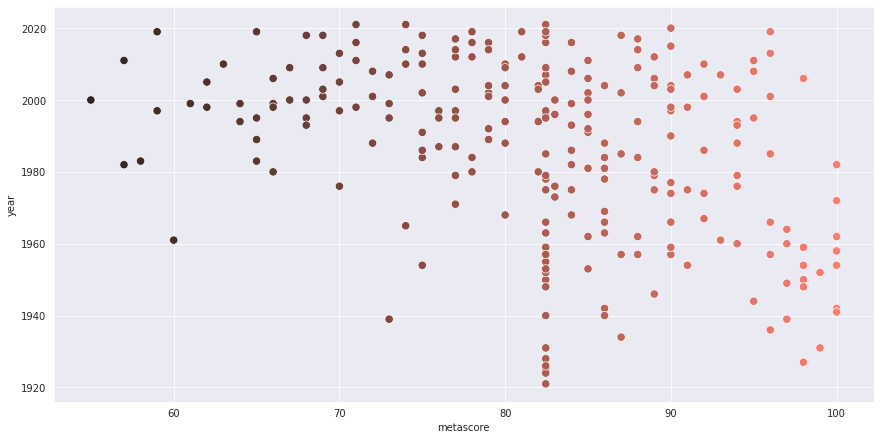

In [33]:
sns.scatterplot(x = 'metascore', y = 'year',hue = 'metascore', data = movies_df, legend = False, palette = 'dark:salmon', s = 70);

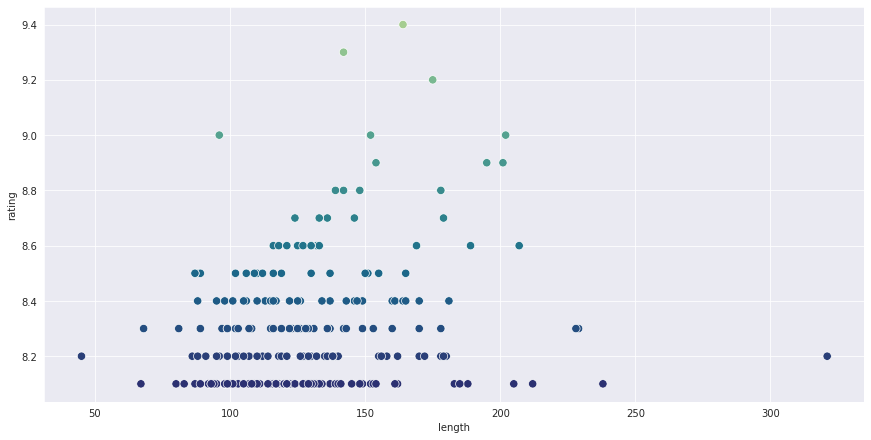

In [34]:
sns.scatterplot(x = 'length', y = 'rating',hue = 'rating', data = movies_df, legend = False, palette = 'crest_r', s = 70);

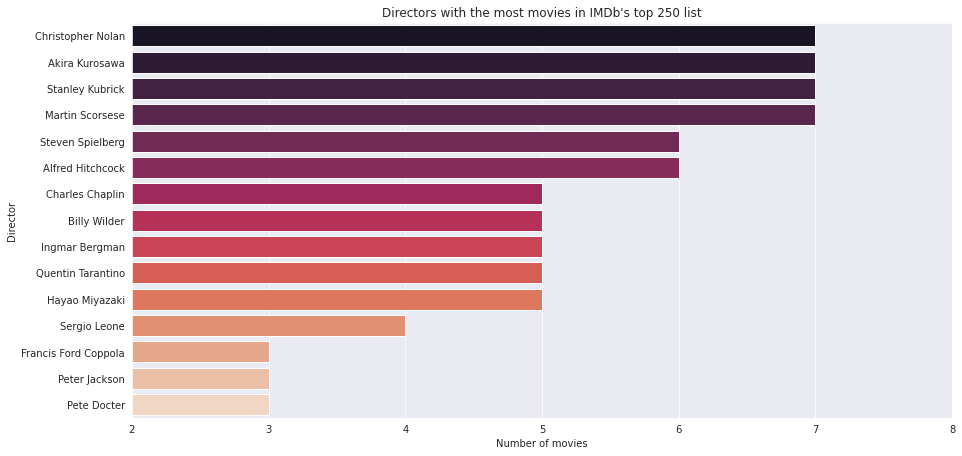

In [35]:
top_directors = movies_df.groupby('director')['name'].count().sort_values(ascending = False).head(15)
sns.barplot(x = top_directors , y = top_directors.index, palette = 'rocket' );
plt.title("Directors with the most movies in IMDb's top 250 list")
plt.xlim(2,8)
plt.xlabel('Number of movies')
plt.ylabel('Director');

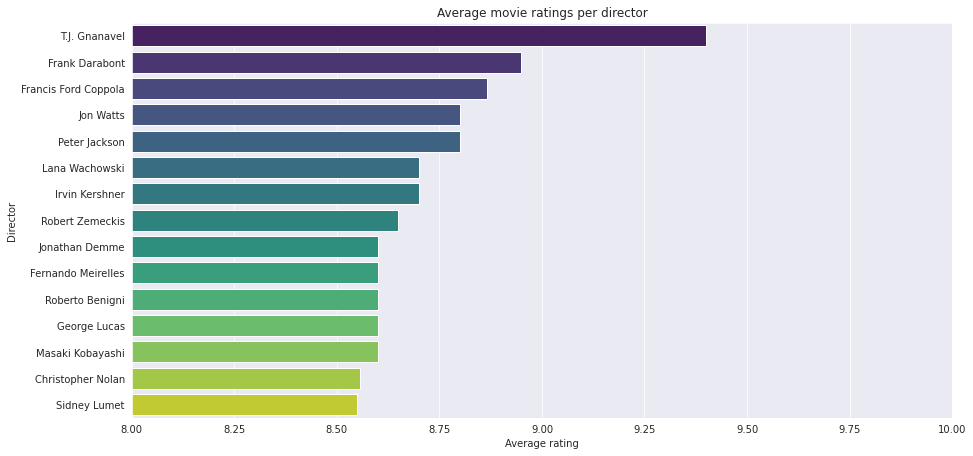

In [36]:
directors_rating = movies_df.groupby('director')['rating'].mean().sort_values(ascending = False).head(15)
sns.barplot(x = directors_rating, y = directors_rating.index, palette = 'viridis')
plt.title('Average movie ratings per director')
plt.xlabel('Average rating')
plt.ylabel('Director')
plt.xlim(8,10);

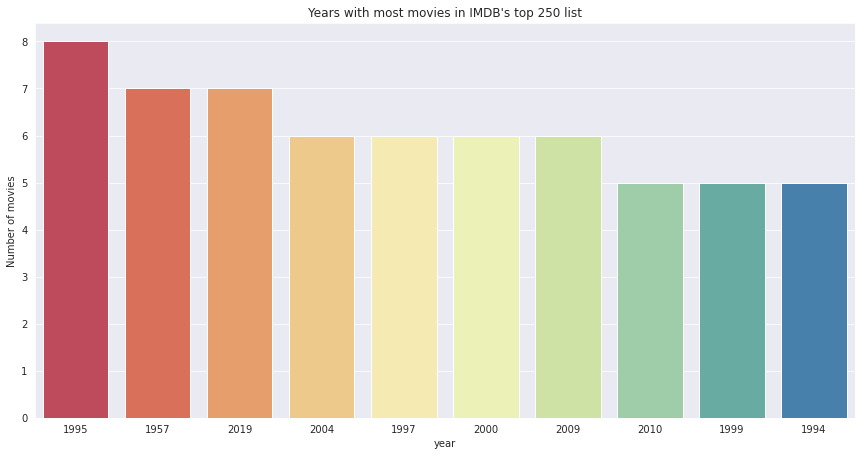

In [37]:
best_years = movies_df.groupby('year')['name'].count().sort_values(ascending = False).head(10)
sns.barplot(x = best_years.index , y=best_years, order = best_years.index, palette = 'Spectral' );
plt.title("Years with most movies in IMDB's top 250 list")
plt.ylabel('Number of movies');

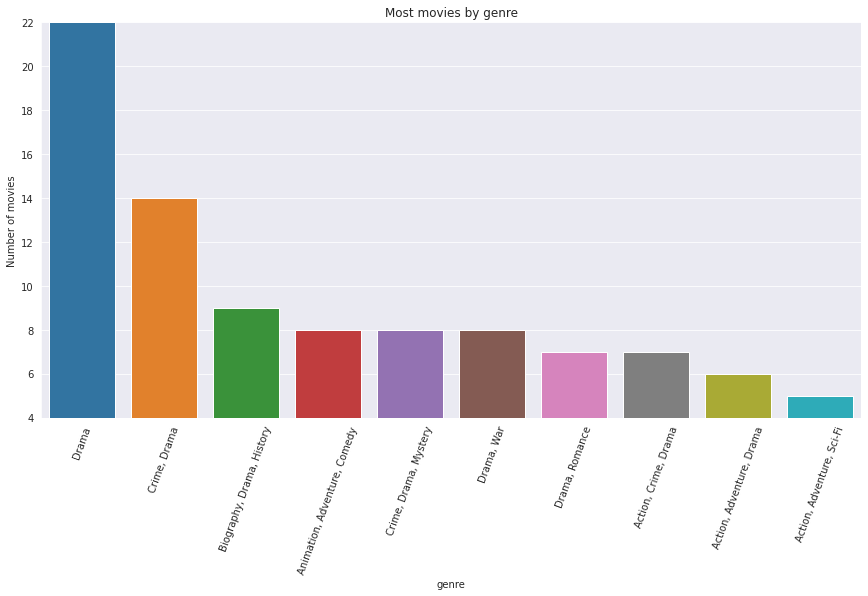

In [38]:
most_by_genre = movies_df.groupby('genre')['name'].count().sort_values(ascending = False).head(10)
sns.barplot(x = most_by_genre.index, y = most_by_genre)
plt.title('Most movies by genre')
plt.ylabel('Number of movies')
plt.xticks(rotation = 70)
plt.ylim(4,22);